# Lead Score Case Study

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Reading And Understanding Data

In [3]:
# Importing all datasets
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.shape

(9240, 37)

In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Replacing 'Select' with NaN (Since it means no option is selected)
leads = leads.replace('Select',np.nan)

In [8]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(leads.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads.isnull().sum()/leads.shape[0]),2).sort_values(ascending=False),columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
How did you hear about X Education,7250,78.46
Lead Profile,6855,74.19
Lead Quality,4767,51.59
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Asymmetrique Activity Index,4218,45.65
City,3669,39.71
Specialization,3380,36.58
Tags,3353,36.29


In [9]:
# checking for nunique values
leads.nunique().sort_values()

Get updates on DM Content                           1
I agree to pay the amount through cheque            1
Receive More Updates About Our Courses              1
Magazine                                            1
Update me on Supply Chain Content                   1
Through Recommendations                             2
Digital Advertisement                               2
Newspaper                                           2
X Education Forums                                  2
A free copy of Mastering The Interview              2
Search                                              2
Newspaper Article                                   2
Converted                                           2
Do Not Call                                         2
Do Not Email                                        2
What matters most to you in choosing a course       3
Asymmetrique Activity Index                         3
Asymmetrique Profile Index                          3
Lead Origin                 

In [10]:
# deleting columns which have only 1 unique value, as they won't contribute in analysis
leads= leads.loc[:,leads.nunique()!=1]
leads.shape

(9240, 32)

In [11]:
# deleting prospect ID, as it's just a unique id given to each lead
leads = leads.drop('Prospect ID', axis=1)
leads.shape

(9240, 31)

In [12]:
# analysing the lead Quality column since it has 51% of nulls
leads[['Lead Quality']]

,Lead Quality
0,Low in Relevance
1,NaN
2,Might be
3,Not Sure
4,Might be
...,...
9235,High in Relevance
9236,Might be
9237,Not Sure
9238,NaN


In [13]:
# Since Lead Quality doesn't look usefull, droping this col
leads = leads.drop('Lead Quality', axis=1)
leads.shape

(9240, 30)

In [14]:
# Deleting the columns with more than 45% nulls
leads = leads.drop(['Asymmetrique Activity Score','How did you hear about X Education','Lead Profile',
                    'Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Profile Score'], axis=1)
leads.shape

(9240, 24)

In [15]:
# removing rows as the column cannot be removed because of its importance
leads = leads[~pd.isnull(leads['Lead Source'])]
leads.shape

(9204, 24)

In [16]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
welearnblog_Home        1
youtubechannel          1
WeLearn                 1
blog                    1
Pay per Click Ads       1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [17]:
# google is apperaring twice
leads.loc[leads['Lead Source'] == 'google',['Lead Source']] = "Google"
leads['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
welearnblog_Home        1
youtubechannel          1
WeLearn                 1
blog                    1
Pay per Click Ads       1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

### Handling Missing values

#### Imputing Numerical Columns with 

In [18]:
# finding numerical cols which have nulls
leads.select_dtypes(include=['float64','int64']).isna().sum().sort_values(ascending=False)

Page Views Per Visit           130
TotalVisits                    130
Total Time Spent on Website      0
Converted                        0
Lead Number                      0
dtype: int64

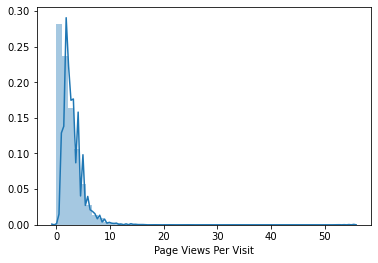

In [19]:
# Analysing Page Views per visit
sns.distplot(leads['Page Views Per Visit'])
plt.show()

In [20]:
leads['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [21]:
# replacing nulls with median of this col
leads['Page Views Per Visit'].replace(np.NaN, leads['Page Views Per Visit'].median(), inplace =True)
leads['Page Views Per Visit'].isnull().sum()

0

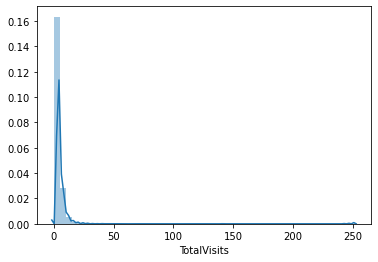

In [22]:
# analysing TotalVisits
sns.distplot(leads['TotalVisits'])
plt.show()

In [23]:
leads['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [24]:
# replacing nulls with median of this col
leads['TotalVisits'].replace(np.NaN, leads['TotalVisits'].median(), inplace =True)
leads['TotalVisits'].isnull().sum()

0

In [25]:
# missing values handled for numeric cols.
leads.select_dtypes(include=['float64','int64']).isna().sum().sort_values(ascending=False)

Page Views Per Visit           0
Total Time Spent on Website    0
TotalVisits                    0
Converted                      0
Lead Number                    0
dtype: int64

#### Imputing Catagorical columns

In [26]:
# All the catagorical columns with null
leads.select_dtypes(include=['object']).isna().sum().sort_values(ascending=False)

City                                             3638
Specialization                                   3352
Tags                                             3342
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2426
Last Activity                                     101
Last Notable Activity                               0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Search                                              0
A free copy of Mastering The Interview              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations                             0
Lead Origin                 

In [27]:
leads.Tags.value_counts()

Will revert after reading the email                  2052
Ringing                                              1200
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          174
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with EINS                                     12
Lost to Others

In [28]:
# placing the nulls in another col Unknown
leads['Tags'].fillna('Unknown',inplace=True)
leads['Tags'].value_counts()

Unknown                                              3342
Will revert after reading the email                  2052
Ringing                                              1200
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          174
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with 

In [29]:
# checking coverted rows for 'Closed by Horizzon'
leads[leads['Tags']=='Closed by Horizzon'].Converted.value_counts()

1    356
0      2
Name: Converted, dtype: int64

In [30]:
# checking coverted rows for 'Lost to EINS'
leads[leads['Tags']=='Lost to EINS'].Converted.value_counts()

1    170
0      4
Name: Converted, dtype: int64

In [31]:
# From Above we can see that both have maximum rows as converted leads, which is not posiible since leads are lost to Competitor
# Hence deleting rows with these values.
leads=leads[~((leads['Tags']=='Closed by Horizzon') | (leads['Tags']=='Lost to EINS'))]
leads.shape

(8672, 24)

In [32]:
# analysing Specialization and putting the nulls in seperate col. Unknown
leads['Specialization'].fillna("Unknown", inplace = True)
leads['Specialization'].value_counts()

Unknown                              3219
Finance Management                    886
Human Resource Management             786
Marketing Management                  778
Operations Management                 462
Business Administration               375
IT Projects Management                349
Banking, Investment And Insurance     325
Supply Chain Management               323
Travel and Tourism                    195
Media and Advertising                 193
International Business                171
Healthcare Management                 145
Hospitality Management                107
E-COMMERCE                            104
Retail Management                      93
Rural and Agribusiness                 70
E-Business                             52
Services Excellence                    39
Name: Specialization, dtype: int64

In [33]:
# analysing 'What is your current occupation'
leads['What is your current occupation'].value_counts()

Unemployed              5201
Working Professional     601
Student                  201
Other                     15
Businessman                7
Housewife                  6
Name: What is your current occupation, dtype: int64

In [34]:
# replacing nulls with mode of col.
leads['What is your current occupation'].fillna("Unemployed", inplace = True)
leads['What is your current occupation'].value_counts()

Unemployed              7842
Working Professional     601
Student                  201
Other                     15
Businessman                7
Housewife                  6
Name: What is your current occupation, dtype: int64

In [35]:
# analysing Country
leads.Country.value_counts()

India                   6199
United States             65
United Arab Emirates      49
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 12
Qatar                     10
Hong Kong                  7
Bahrain                    6
Oman                       5
unknown                    5
France                     5
Germany                    4
South Africa               4
Nigeria                    4
Canada                     4
Kuwait                     4
Sweden                     3
Belgium                    2
China                      2
Italy                      2
Ghana                      2
Asia/Pacific Region        2
Philippines                2
Uganda                     2
Bangladesh                 2
Netherlands                2
Malaysia                   1
Tanzania                   1
Kenya                      1
Liberia                    1
Sri Lanka                  1
Indonesia                  1
Russia        

In [36]:
# Replacing nulls with India since it has almost all the population
leads.loc[pd.isnull(leads['Country']), ['Country']] = 'India'
leads['Country'].value_counts()

India                   8397
United States             65
United Arab Emirates      49
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 12
Qatar                     10
Hong Kong                  7
Bahrain                    6
Oman                       5
unknown                    5
France                     5
Germany                    4
South Africa               4
Nigeria                    4
Canada                     4
Kuwait                     4
Sweden                     3
Belgium                    2
China                      2
Italy                      2
Ghana                      2
Asia/Pacific Region        2
Philippines                2
Uganda                     2
Bangladesh                 2
Netherlands                2
Malaysia                   1
Tanzania                   1
Kenya                      1
Liberia                    1
Sri Lanka                  1
Indonesia                  1
Russia        

In [37]:
# Since Countries apart from India have ver less amount of values, so combining them as Outside India
leads['Country'] = leads['Country'].apply(lambda x: 'India' if x=='India' else 'Outside India')
leads['Country'].value_counts()

India            8397
Outside India     275
Name: Country, dtype: int64

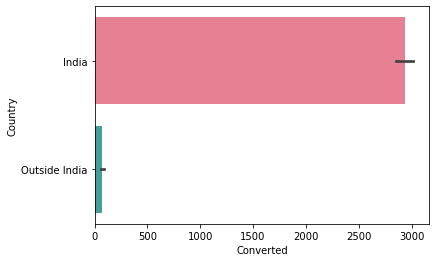

In [38]:
sns.barplot(y='Country', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [39]:
# dropping city and What matters most to you in choosing a course since they contain nulls and conversion is not distributed
leads=leads.drop(['City','What matters most to you in choosing a course','Last Activity'],1)
leads.shape

(8672, 21)

In [40]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(leads.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads.isnull().sum()/leads.shape[0]),2).sort_values(ascending=False),columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Last Notable Activity,0,0.0
Country,0,0.0
Lead Origin,0,0.0
Lead Source,0,0.0
Do Not Email,0,0.0
Do Not Call,0,0.0
Converted,0,0.0
TotalVisits,0,0.0
Total Time Spent on Website,0,0.0
Page Views Per Visit,0,0.0


### Missing values handled

## EDA

In [41]:
# All the catagorical cols in dataframe
cat_col=leads.select_dtypes(exclude=['float64','int64','datetime64'])
cat_col.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Country',
       'Specialization', 'What is your current occupation', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [42]:
# function for plotting Categorical columns with the count of target column i.e Converted to see the actual no. of 
# converted or not in each col by ploting
def plotting1(column1):
    
    col1 = column1
    fig = plt.figure(figsize=(15,10))
    plot=sns.catplot(x=column1, hue = "Converted", kind="count", data=leads, palette="Set2", aspect= 1.7)
    ax = plot.facet_axis(0,0)
    for p in ax.patches:

        if np.isnan(p.get_height()):
            height = 0
        else:
            height = p.get_height()

        height = int(height)
        ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    plt.xticks(rotation=90)
    plt.show()

<Figure size 1080x720 with 0 Axes>

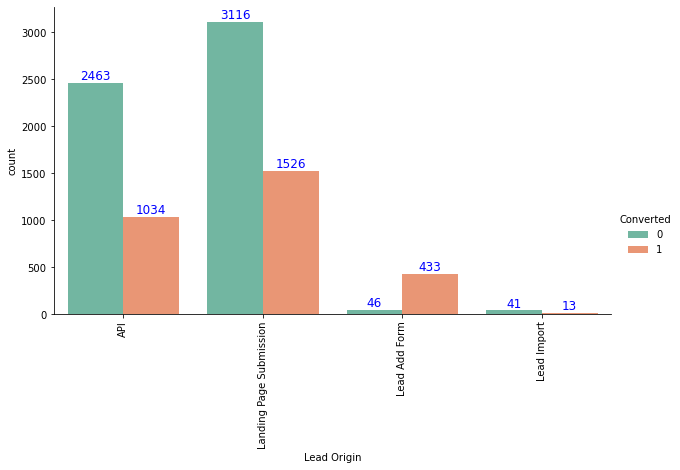

In [43]:
plotting1('Lead Origin')

<Figure size 1080x720 with 0 Axes>

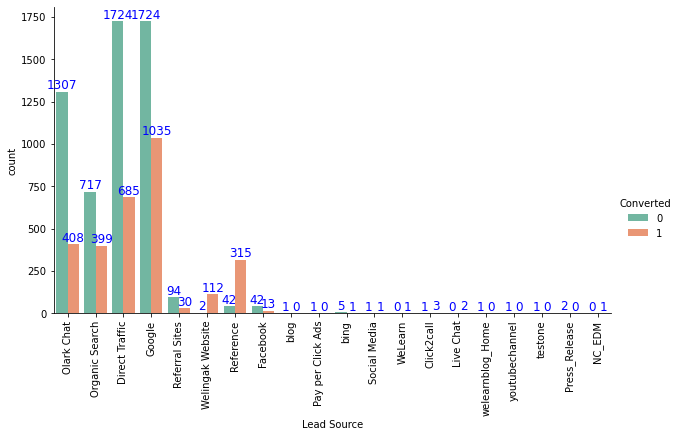

In [44]:
plotting1('Lead Source')

<Figure size 1080x720 with 0 Axes>

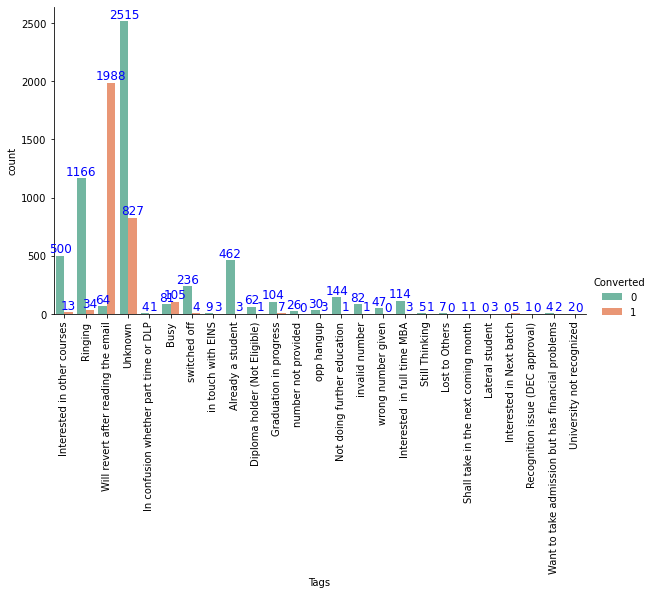

In [45]:
plotting1('Tags')

<Figure size 1080x720 with 0 Axes>

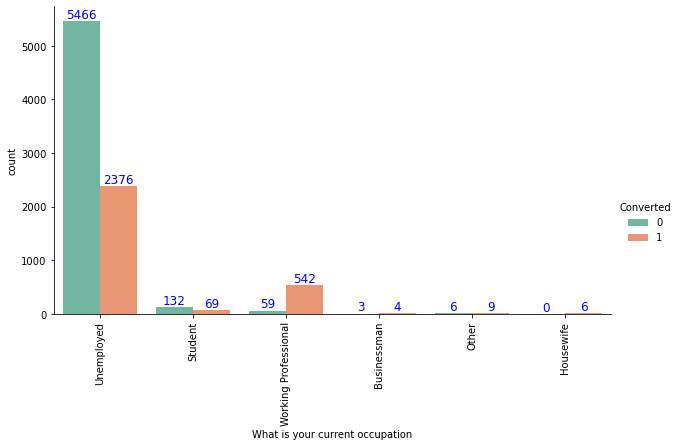

In [46]:
plotting1('What is your current occupation')

<Figure size 1080x720 with 0 Axes>

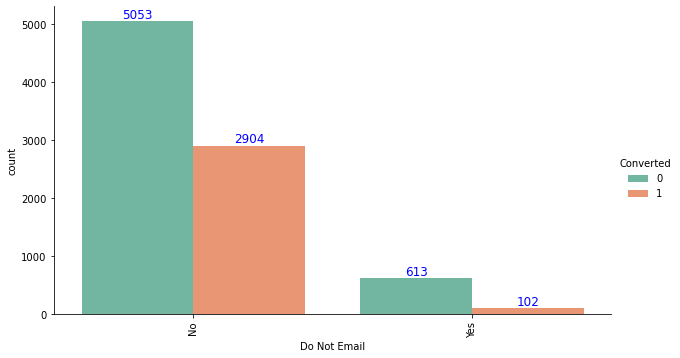

In [47]:
plotting1('Do Not Email')

<Figure size 1080x720 with 0 Axes>

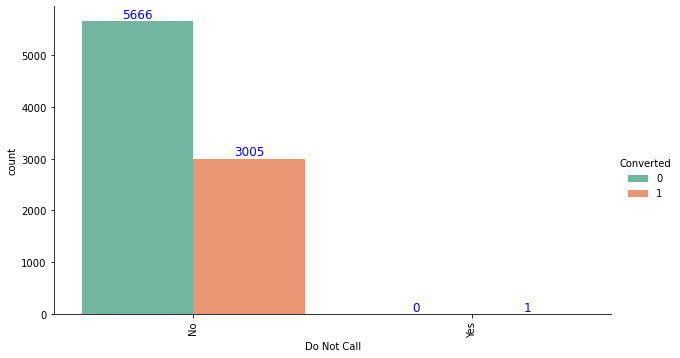

In [48]:
plotting1('Do Not Call')

<Figure size 1080x720 with 0 Axes>

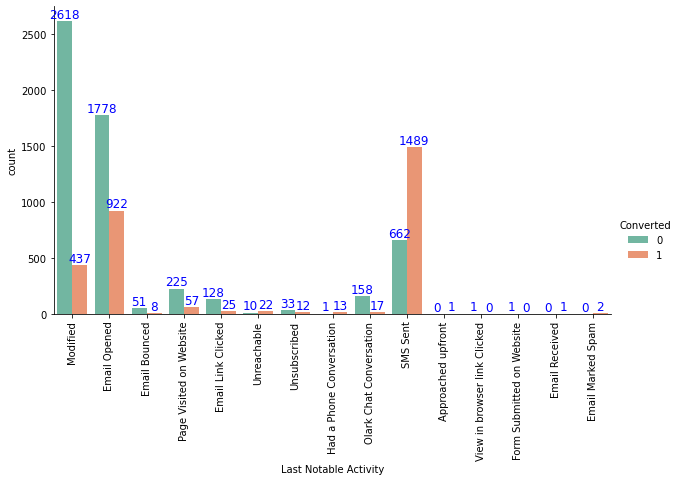

In [49]:
plotting1('Last Notable Activity')

<Figure size 1080x720 with 0 Axes>

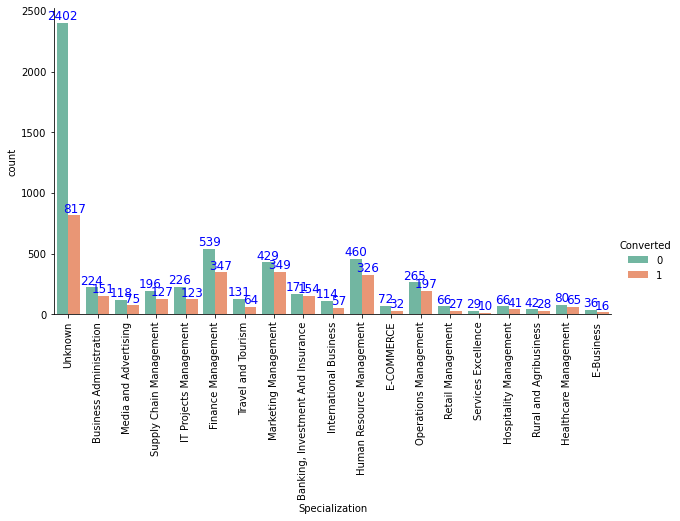

In [50]:
plotting1('Specialization')

<Figure size 1080x720 with 0 Axes>

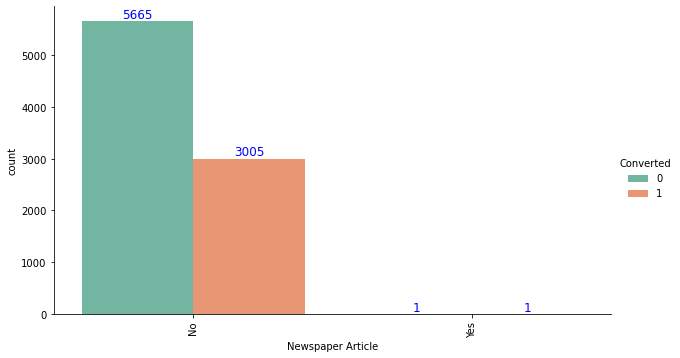

In [51]:
plotting1('Newspaper Article')

<Figure size 1080x720 with 0 Axes>

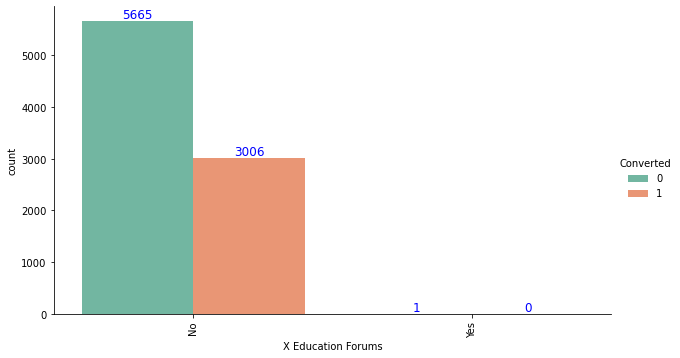

In [52]:
plotting1('X Education Forums')

<Figure size 1080x720 with 0 Axes>

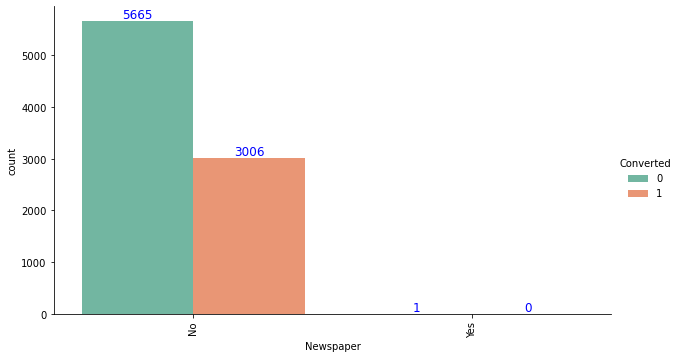

In [53]:
plotting1('Newspaper')

<Figure size 1080x720 with 0 Axes>

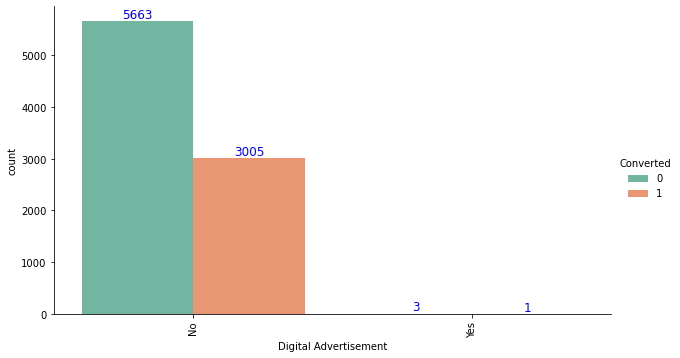

In [54]:
plotting1('Digital Advertisement')

<Figure size 1080x720 with 0 Axes>

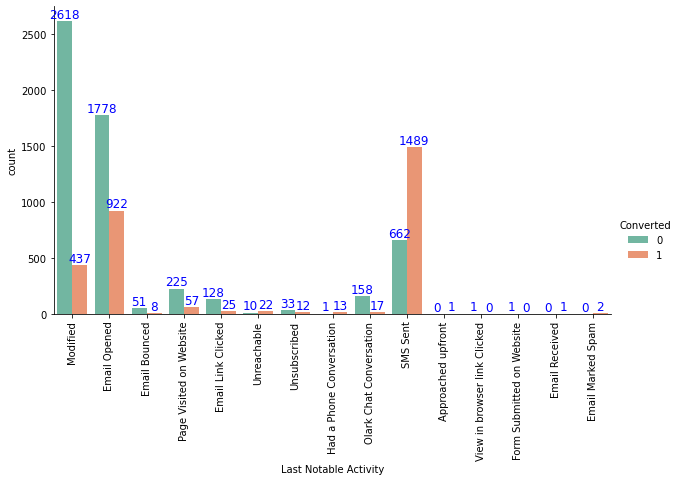

In [55]:
plotting1('Last Notable Activity')

<Figure size 1080x720 with 0 Axes>

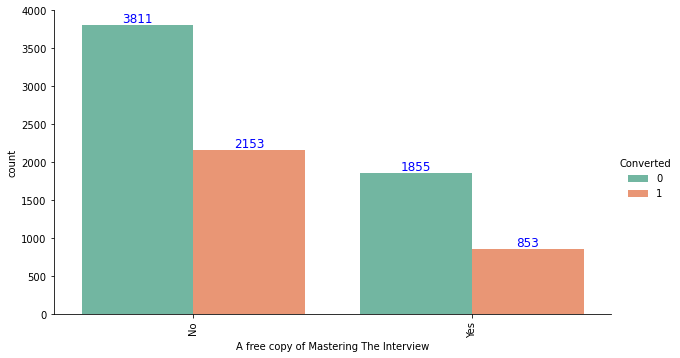

In [56]:
plotting1('A free copy of Mastering The Interview')

<Figure size 1080x720 with 0 Axes>

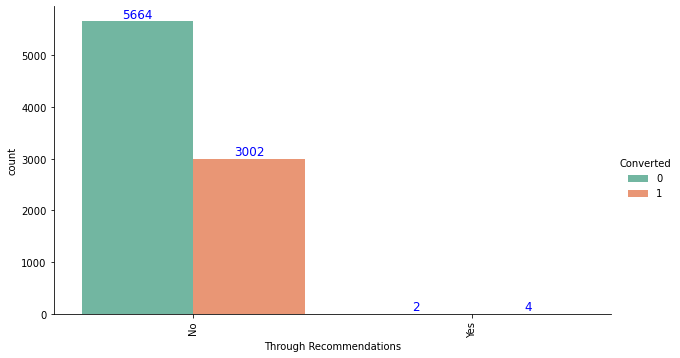

In [57]:
plotting1('Through Recommendations')

In [58]:
# Dropping Newspaper column, Newspaper Article & X Education Forum column since they ~2 rows which have converted that will not be fruitful in our analysis

leads = leads.drop(['Newspaper', 'X Education Forums', 'Newspaper Article','Through Recommendations','Search','Digital Advertisement','Do Not Call'], axis=1)

In [59]:
cols = list(leads.columns)
num_cols = list(leads.describe().columns)
cat_cols = [col for col in cols if col not in num_cols]
print(cat_cols)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Country', 'Specialization', 'What is your current occupation', 'Tags', 'A free copy of Mastering The Interview', 'Last Notable Activity']


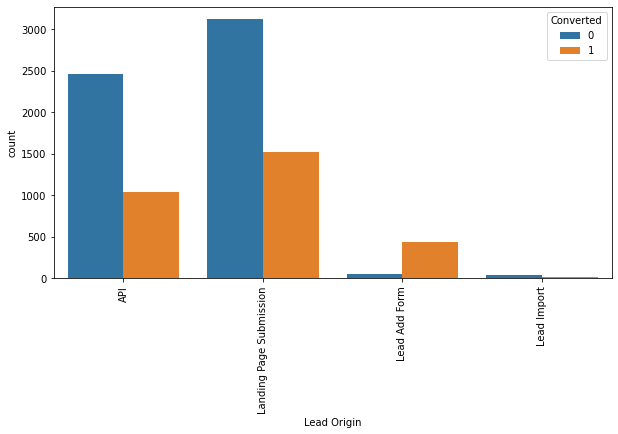

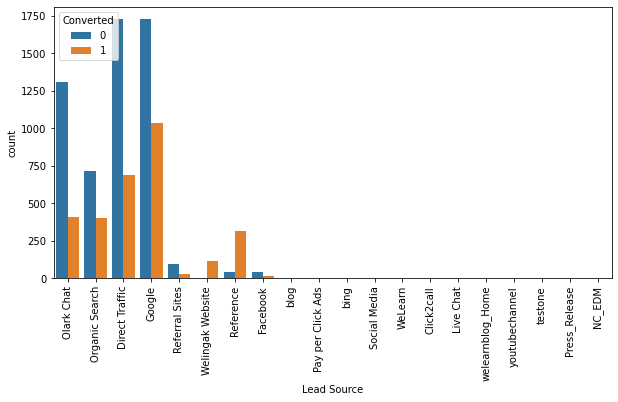

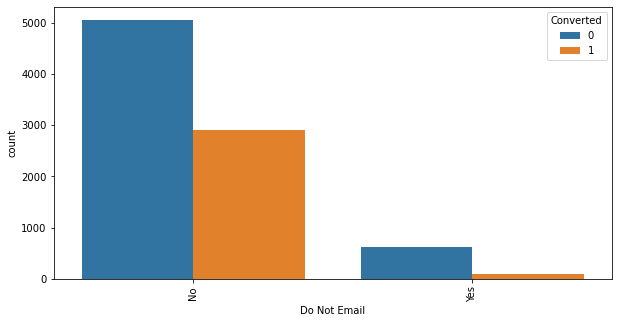

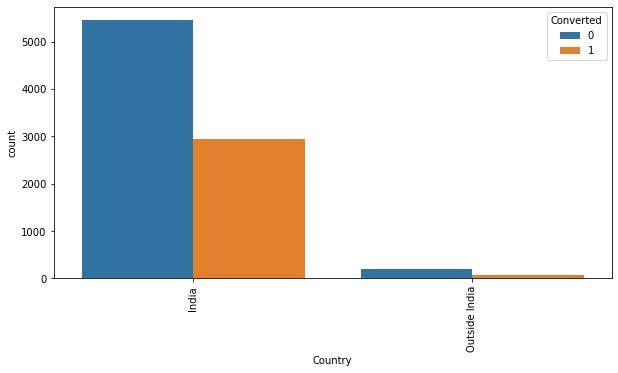

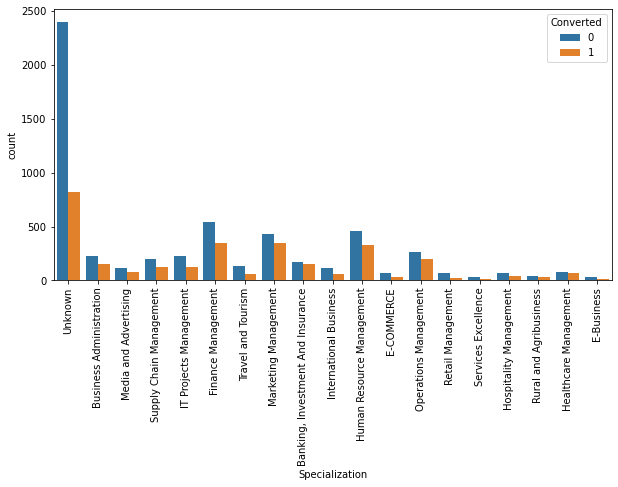

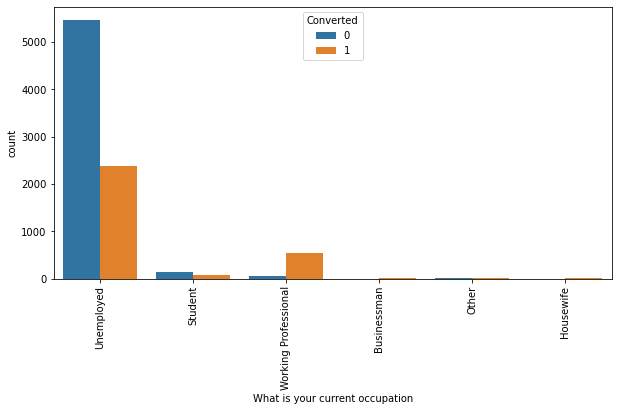

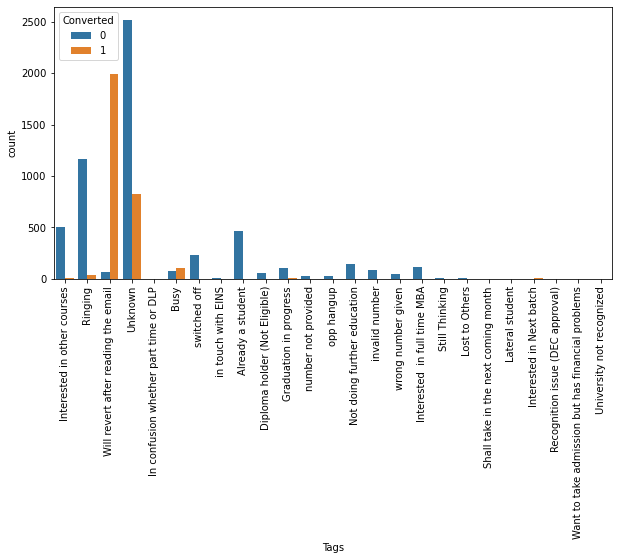

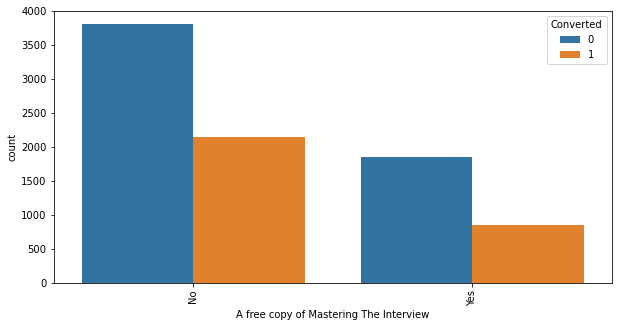

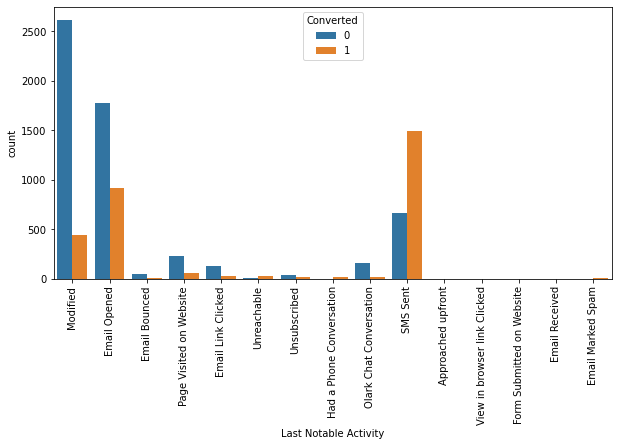

In [60]:
for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(leads[col], hue= leads.Converted)
    plt.xticks(rotation=90)
    plt.show()

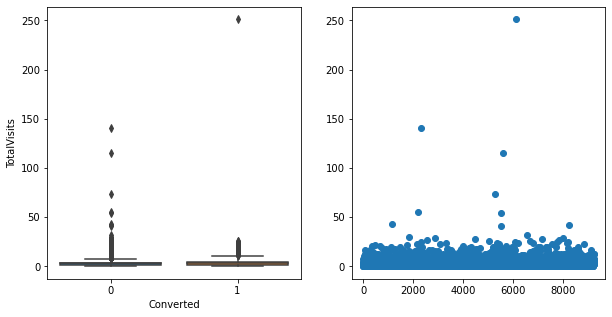

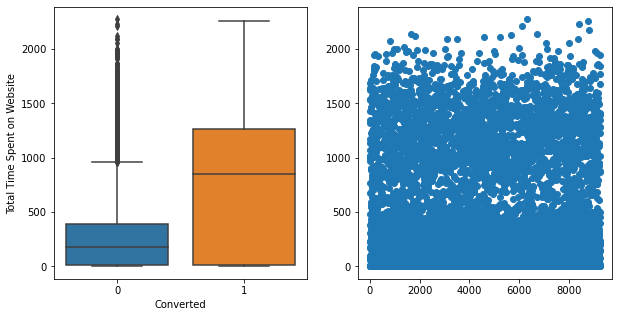

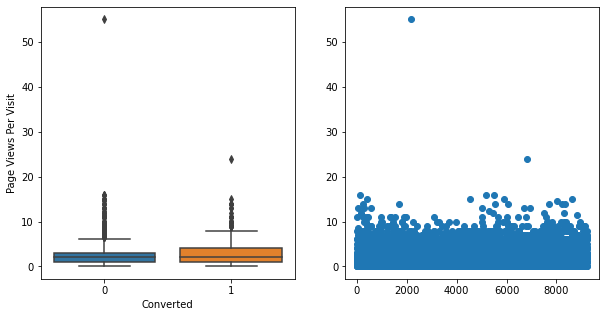

In [61]:
# Checking Numerical Cols Vs Conversion rate
for col in ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']:
    plt.figure(figsize=(10,5))
    ax1 = plt.subplot(1,2,1)
    sns.boxplot(y=leads[col], x=leads.Converted)
    
    ax2 = plt.subplot(1,2,2)
    plt.scatter(leads.index, leads[col])
    plt.show()

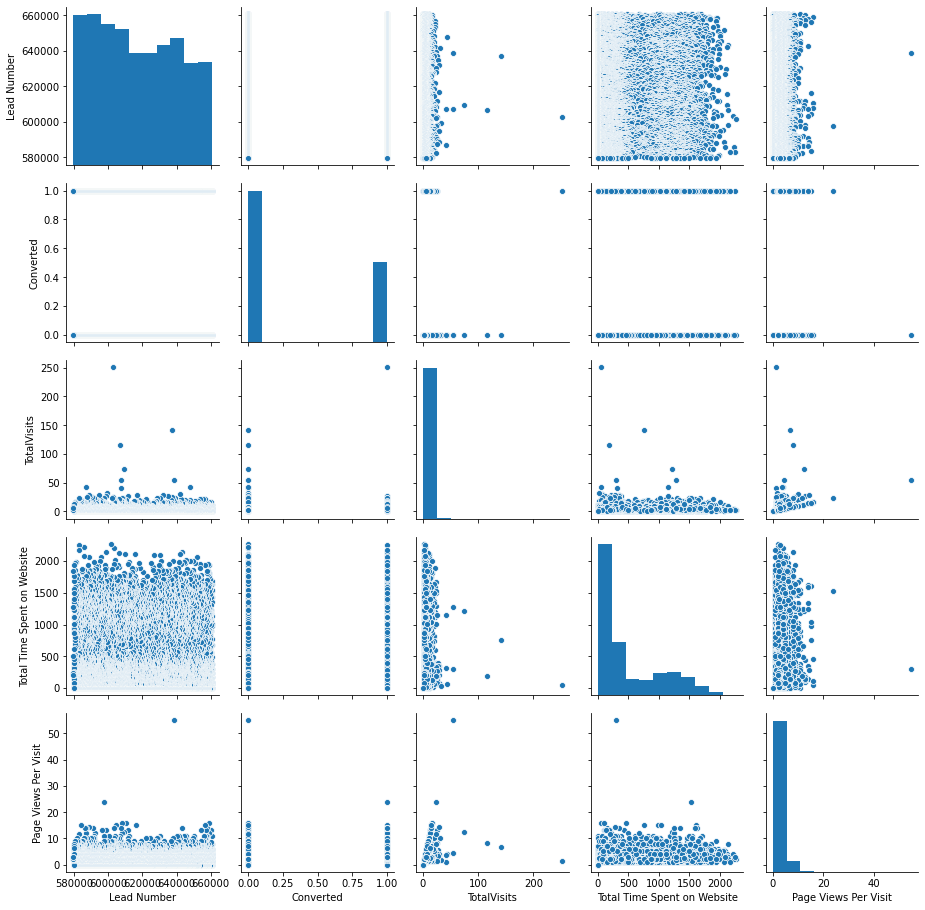

In [62]:
#visualizing numerical value
sns.pairplot(leads)
plt.show()

### Outlier Treatment

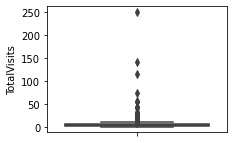

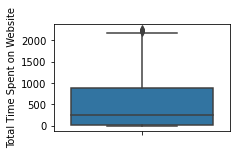

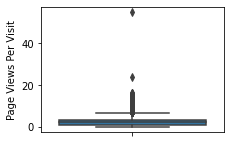

In [63]:
#Drawing boxplot for outlier analysis
numeric_variables = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
def outlier_analysis_boxplot(numeric):
  for idx, variable in enumerate(numeric):
    plt.subplot(2, 2, (idx + 1))
    sns.boxplot(y=variable, data=leads)
    plt.tight_layout()
    plt.show()
outlier_analysis_boxplot(numeric_variables)

In [64]:
leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8672.000000,8672.000000,8672.000000
mean,3.431504,475.011531,2.394172
std,4.852255,539.517913,2.160538
min,0.000000,0.000000,0.000000
25%,1.000000,16.000000,1.000000
50%,3.000000,243.000000,2.000000
75%,5.000000,888.000000,3.330000
90%,7.000000,1366.000000,5.000000
95%,9.000000,1551.000000,6.000000
99%,16.290000,1839.290000,9.000000


Most of the outliers are lying after 99% Quantile

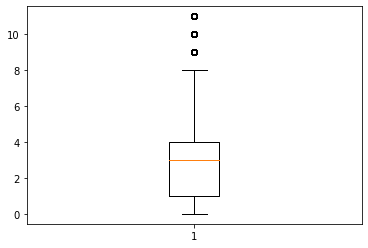

In [65]:
# teating outliers one by one
Q1 = leads['TotalVisits'].quantile(0.25)
Q3 = leads['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
leads = leads[(leads['TotalVisits'] >= Q1 - 1.5*IQR) & (leads['TotalVisits'] <= Q3 + 1.5*IQR)]
plt.boxplot(leads['TotalVisits'])
plt.show()

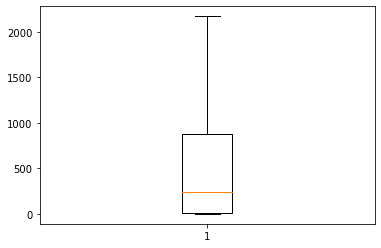

In [66]:
Q1 = leads['Total Time Spent on Website'].quantile(0.25)
Q3 = leads['Total Time Spent on Website'].quantile(0.75)
IQR = Q3 - Q1
leads = leads[(leads['Total Time Spent on Website'] >= Q1 - 1.5*IQR) & (leads['Total Time Spent on Website'] <= Q3 + 1.5*IQR)]
plt.boxplot(leads['Total Time Spent on Website'])
plt.show()

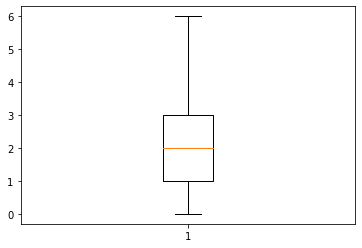

In [67]:
Q1 = leads['Page Views Per Visit'].quantile(0.25)
Q3 = leads['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
leads = leads[(leads['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads['Page Views Per Visit'] <= Q3 + 1.5*IQR)]
plt.boxplot(leads['Page Views Per Visit'])
plt.show()

In [68]:
leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8144.000000,8144.000000,8144.00000
mean,2.815815,463.647471,2.10822
std,2.386712,535.990120,1.65057
min,0.000000,0.000000,0.00000
25%,1.000000,3.000000,1.00000
50%,3.000000,233.000000,2.00000
75%,4.000000,866.000000,3.00000
90%,6.000000,1354.000000,4.00000
95%,7.000000,1538.000000,5.00000
99%,10.000000,1834.140000,6.00000


From Above we can see that now outliers are handled.

In [69]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,India,Unknown,Unemployed,Interested in other courses,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,India,Unknown,Unemployed,Ringing,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,India,Business Administration,Student,Will revert after reading the email,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Ringing,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,India,Unknown,Unemployed,Will revert after reading the email,No,Modified


In [70]:
 ### Checking the Converted Rate
print(len(leads[leads['Converted']==1]),len(leads[leads['Converted']==0]))

2813 5331


In [71]:
# cols finally left for Analysis
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8144 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             8144 non-null   int64  
 1   Lead Origin                             8144 non-null   object 
 2   Lead Source                             8144 non-null   object 
 3   Do Not Email                            8144 non-null   object 
 4   Converted                               8144 non-null   int64  
 5   TotalVisits                             8144 non-null   float64
 6   Total Time Spent on Website             8144 non-null   int64  
 7   Page Views Per Visit                    8144 non-null   float64
 8   Country                                 8144 non-null   object 
 9   Specialization                          8144 non-null   object 
 10  What is your current occupation         8144 non-null   obje

In [72]:
# All the categories with Unknown, others and other Leads as values puttin nulls in them as they won't be fruitful 
#when we make dummy cols of them seperately.
for col in leads.columns:
    leads.loc[leads[col]=='Unknown',col]=np.nan

In [73]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(leads.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads.isnull().sum()/leads.shape[0]),2).sort_values(ascending=False),columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Tags,3176,39.00
Specialization,3141,38.57
Last Notable Activity,0,0.00
A free copy of Mastering The Interview,0,0.00
What is your current occupation,0,0.00
Country,0,0.00
Page Views Per Visit,0,0.00
Total Time Spent on Website,0,0.00
TotalVisits,0,0.00
Converted,0,0.00


In [74]:
# making dummy cols for those cols first which have Y/N as categories, others as categories and we can safely drop_first in them
df1=pd.get_dummies(leads,columns=['Do Not Email', 'Country', 'A free copy of Mastering The Interview'],drop_first=True)
df1

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Tags,Last Notable Activity,Do Not Email_Yes,Country_Outside India,A free copy of Mastering The Interview_Yes
0,660737.0,API,Olark Chat,0.0,0.0,0.0,0.00,NaN,Unemployed,Interested in other courses,Modified,0,0,0
1,660728.0,API,Organic Search,0.0,5.0,674.0,2.50,NaN,Unemployed,Ringing,Email Opened,0,0,0
2,660727.0,Landing Page Submission,Direct Traffic,1.0,2.0,1532.0,2.00,Business Administration,Student,Will revert after reading the email,Email Opened,0,0,1
3,660719.0,Landing Page Submission,Direct Traffic,0.0,1.0,305.0,1.00,Media and Advertising,Unemployed,Ringing,Modified,0,0,0
4,660681.0,Landing Page Submission,Google,1.0,2.0,1428.0,1.00,NaN,Unemployed,Will revert after reading the email,Modified,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564.0,Landing Page Submission,Direct Traffic,1.0,8.0,1845.0,2.67,IT Projects Management,Unemployed,Will revert after reading the email,Email Marked Spam,1,1,0
9236,579546.0,Landing Page Submission,Direct Traffic,0.0,2.0,238.0,2.00,Media and Advertising,Unemployed,wrong number given,SMS Sent,0,0,1
9237,579545.0,Landing Page Submission,Direct Traffic,0.0,2.0,199.0,2.00,Business Administration,Unemployed,invalid number,SMS Sent,1,0,1
9238,579538.0,Landing Page Submission,Google,1.0,3.0,499.0,3.00,Human Resource Management,Unemployed,NaN,SMS Sent,0,0,0


In [75]:
# another dataframe for cols which had unknowns and others category which are replaced by nulls for now
# So that while making dummy cols for them, nulls get replaced by 0
df2=leads[['Lead Number','Specialization','Tags','What is your current occupation','Lead Origin','Lead Source','Last Notable Activity']]

df2=pd.get_dummies(df2,columns=['Lead Origin','Lead Source','Last Notable Activity','Specialization','Tags','What is your current occupation'],drop_first=False)
df2

,Lead Number,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,660737.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,660728.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,660727.0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,660719.0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,660681.0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564.0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9236,579546.0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
9237,579545.0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9238,579538.0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [76]:
leads = pd.concat([df1, df2], axis=1)
leads=leads.drop(['Specialization','Tags','What is your current occupation','Lead Origin','Lead Source','Last Notable Activity'],axis=1)
leads

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_Yes,Country_Outside India,A free copy of Mastering The Interview_Yes,Lead Number,Lead Origin_API,...,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,660737.0,0.0,0.0,0.0,0.00,0,0,0,660737.0,1,...,0,0,0,0,0,0,0,0,1,0
1,660728.0,0.0,5.0,674.0,2.50,0,0,0,660728.0,1,...,0,0,0,0,0,0,0,0,1,0
2,660727.0,1.0,2.0,1532.0,2.00,0,0,1,660727.0,0,...,0,0,0,0,0,0,0,1,0,0
3,660719.0,0.0,1.0,305.0,1.00,0,0,0,660719.0,0,...,0,0,0,0,0,0,0,0,1,0
4,660681.0,1.0,2.0,1428.0,1.00,0,0,0,660681.0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564.0,1.0,8.0,1845.0,2.67,1,1,0,579564.0,0,...,0,0,0,0,0,0,0,0,1,0
9236,579546.0,0.0,2.0,238.0,2.00,0,0,1,579546.0,0,...,0,0,0,1,0,0,0,0,1,0
9237,579545.0,0.0,2.0,199.0,2.00,1,0,1,579545.0,0,...,0,0,0,0,0,0,0,0,1,0
9238,579538.0,1.0,3.0,499.0,3.00,0,0,0,579538.0,0,...,0,0,0,0,0,0,0,0,1,0


In [77]:
 ### Checking the Converted Rate
Conversion = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Conversion

34.54076620825147

### Test train split

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
# The feature variables should be moved to X
X = leads.drop(['Converted', 'Lead Number'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_Yes,Country_Outside India,A free copy of Mastering The Interview_Yes,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0.0,0.0,0.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5.0,674.0,2.5,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2.0,1532.0,2.0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,305.0,1.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2.0,1428.0,1.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [80]:
# Plotting Corr matrix with high correlation
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
corr=X.corr()
df=corr[(corr>0.7) | (corr<-0.7)]
df

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_Yes,Country_Outside India,A free copy of Mastering The Interview_Yes,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Already a student,Tags_Busy,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
TotalVisits,1.000000,NaN,0.760233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Time Spent on Website,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Page Views Per Visit,0.760233,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

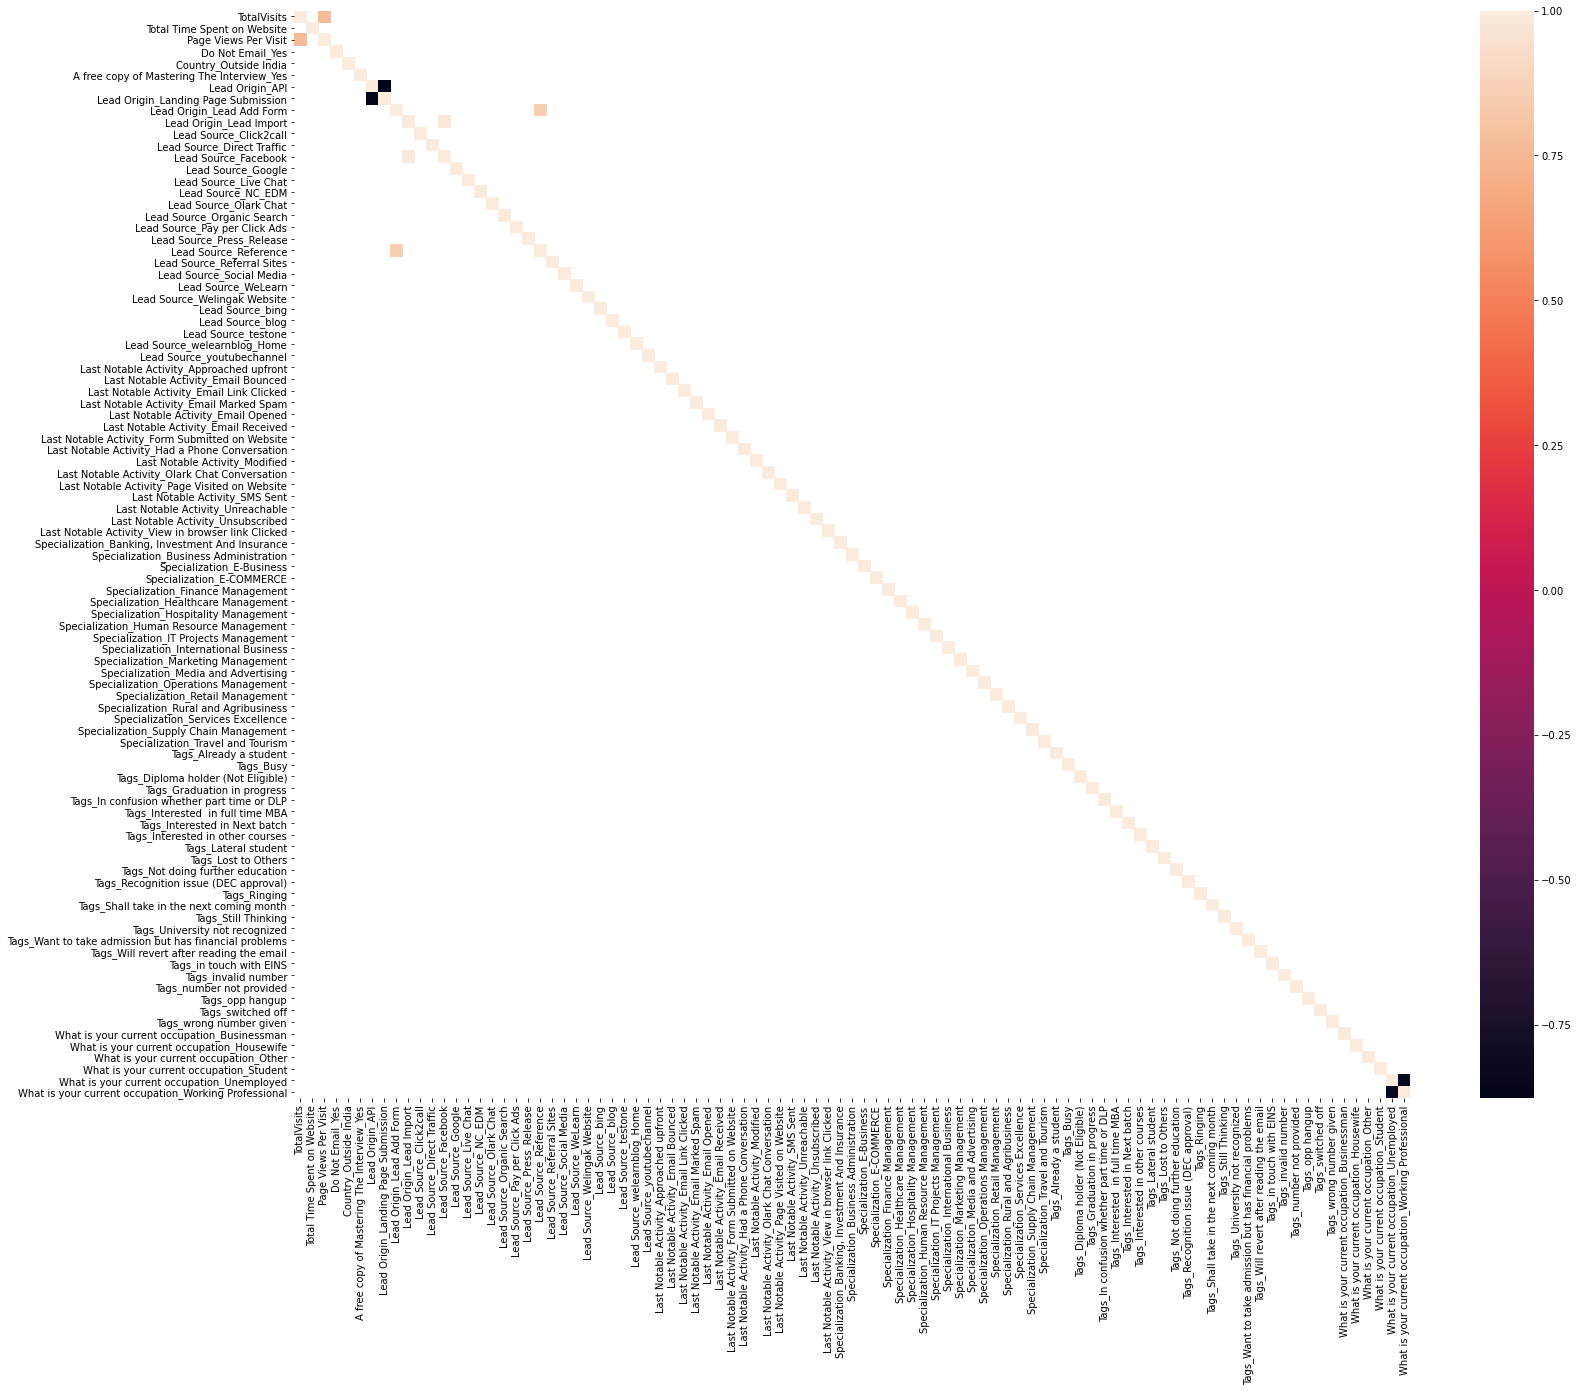

In [81]:
plt.figure(figsize=(25,20))
sns.heatmap(df)

In [82]:
# The output variables should be put in y
y = leads['Converted']
y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Converted, dtype: float64

In [83]:
print(X.shape, y.shape)

(8144, 93) (8144,)


In [84]:
# Lets split the data into test and train for the model
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling for uniform scale of data

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
# consider numeric variables and scale them
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_Yes,Country_Outside India,A free copy of Mastering The Interview_Yes,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Already a student,Tags_Busy,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
5058,-0.331934,1.316691,-0.662170,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4933,-1.171714,-0.859041,-1.268424,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3940,0.087956,1.111081,0.550338,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7317,1.347625,-0.341277,-0.055916,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4122,-0.751824,-0.225387,-0.662170,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [87]:
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_Yes,Country_Outside India,A free copy of Mastering The Interview_Yes,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Already a student,Tags_Busy,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
count,5.700000e+03,5.700000e+03,5.700000e+03,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.0,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.0,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.0,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.00000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000

## Bulding the model

In [88]:
# Model 1

import statsmodels.api as sm

In [89]:
logm1 = sm.GLM(y_train.astype(float),(sm.add_constant(X_train.astype(float))), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5700
Model:                            GLM   Df Residuals:                     5613
Model Family:                Binomial   Df Model:                           86
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 07 Mar 2021   Deviance:                          nan
Time:                        22:17:06   Pearson chi2:                 2.21e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                  -9.746e+14   1.45e+07  -6.72e+07      0.000   -9.75e+14   -9.75e+14
TotalVisits                                             1.441e+14   1.47e+06    9.8e+07      0.000    1.44e+14    1.44e+14
Total Time Spent on Website                             2.942e+14   9.69e+05   3.04e+08      0.000    2.94e+14    2.94e+14
Page Views Per Visit                                   -2.125e+14   1.58e+06  -1.35e+08      0.000   -2.12e+14   -2.12e+14
Do Not Email_Yes                                       -1.737e+14   3.82e+06  -4.55e+07      0.000   -1.74e+14   -1.74e+14
Country_Outside India                                   5.457e+13   5.11e+06   1.07e+07      0.000    5.46e+13    5.46e+13
A free copy of Mastering The Interview_Yes             -4.565e+12   2.93e+06  -1.56e+06      0.000   -4.57e+12   -4.57e+12
Lead Origin_API                                         1.458e+15   2.25e+07   6.49e+07      0.000    1.46e+15    1.46e+15
Lead Origin_Landing Page Submission                     1.143e+15   2.24e+07   5.09e+07      0.000    1.14e+15    1.14e+15
Lead Origin_Lead Add Form                              -6.175e+15   5.31e+07  -1.16e+08      0.000   -6.17e+15   -6.17e+15
Lead Origin_Lead Import                                 2.599e+15   5.63e+07   4.61e+07      0.000     2.6e+15     2.6e+15
Lead Source_Click2call                                  2.416e+15    9.5e+07   2.54e+07      0.000    2.42e+15    2.42e+15
Lead Source_Direct Traffic                              2.137e+14   1.86e+07   1.15e+07      0.000    2.14e+14    2.14e+14
Lead Source_Facebook                                   -8.116e+14   6.64e+07  -1.22e+07      0.000   -8.12e+14   -8.12e+14
Lead Source_Google                                       2.31e+14   1.85e+07   1.25e+07      0.000    2.31e+14    2.31e+14
Lead Source_Live Chat                                   9.005e+15   8.37e+07   1.08e+08      0.000       9e+15       9e+15
Lead Source_NC_EDM                                        40.7163   5.72e-07   7.12e+07      0.000      40.716      40.716
Lead Source_Olark Chat                                  2.368e+14   1.86e+07   1.27e+07      0.000    2.37e+14    2.37e+14
Lead Source_Organic Search                              2.585e+14   1.86e+07   1.39e+07      0.000    2.58e+14    2.58e+14
Lead Source_Pay per Click Ads                          -7.378e+15   6.64e+07  -1.11e+08      0.000   -7.38e+15   -7.38e+15
Lead Source_Press_Release                              -3.215e+15   6.67e+07  -4.82e+07      0.000   -3.22e+15   -3.22e+15
Lead Source_Reference                                    7.88e+15   5.45e+07   1.45e+08      0.000    7.88e+15    7.88e+15
Lead Sou

## Feature Selection through RFE

In [90]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [91]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [92]:
rfe.support_

array([False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True,  True, False,  True, False,  True, False,
       False,  True, False,  True, False, False, False, False,  True,
       False,  True,  True,  True,  True,  True, False, False, False,
       False, False, False])

In [93]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 29),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 27),
 ('Do Not Email_Yes', False, 3),
 ('Country_Outside India', False, 62),
 ('A free copy of Mastering The Interview_Yes', False, 55),
 ('Lead Origin_API', False, 16),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 38),
 ('Lead Source_Click2call', False, 49),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 32),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Live Chat', False, 69),
 ('Lead Source_NC_EDM', False, 73),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 33),
 ('Lead Source_Pay per Click Ads', False, 68),
 ('Lead Source_Press_Release', False, 70),
 ('Lead Source_Reference', False, 10),
 ('Lead Source_Referral Sites', False, 34),
 ('Lead Source_Social Media', False, 61),
 ('Lead Source_WeLearn', False, 66),
 ('Lead Source_Welingak 

In [94]:
# Get columns from RFE
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Already a student',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_opp hangup', 'Tags_switched off',
       'Tags_wrong number given'],
      dtype='object')

In [95]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5700
Model:                            GLM   Df Residuals:                     5679
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1150.7
Date:                Sun, 07 Mar 2021   Deviance:                       2301.5
Time:                        22:17:21   Pearson chi2:                 8.70e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.6525      0.101    -16.310      0.000      -1.851      -1.454
Total Time Spent on Website                       1.1048      0.063     17.411      0.000       0.980       1.229
Lead Origin_Lead Add Form                         1.3119      0.356      3.688      0.000       0.615       2.009
Lead Source_Olark Chat                            1.2272      0.149      8.210      0.000       0.934       1.520
Lead Source_Welingak Website                      4.4006      0.821      5.357      0.000       2.791       6.011
Last Notable Activity_Modified                   -1.3014      0.137     -9.521      0.000      -1.569      -1.033
Last Notable Activity_Olark Chat Conversation    -1.5334      0.435     -3.526      0.000      -2.386      -0.681
Last Notable Activity_SMS Sent                    2.2933      0.142     16.127      0.000       2.015       2.572
Tags_Already a student                           -3.5534      0.728     -4.879      0.000      -4.981      -2.126
Tags_Diploma holder (Not Eligible)              -23.0243   1.87e+04     -0.001      0.999   -3.66e+04    3.66e+04
Tags_Graduation in progress                      -1.5570      0.820     -1.899      0.058      -3.164       0.050
Tags_Interested  in full time MBA                -2.5699      1.032     -2.491      0.013      -4.592      -0.548
Tags_Interested in other courses                 -1.9418      0.389     -4.990      0.000      -2.704      -1.179
Tags_Not doing further education                 -2.7223      1.027     -2.651      0.008      -4.735      -0.710
Tags_Ringing                                     -3.6017      0.255    -14.138      0.000      -4.101      -3.102
Tags_Will revert after reading the email          4.3966      0.185     23.749      0.000       4.034       4.759
Tags_invalid number                              -3.4933      1.064     -3.282      0.001      -5.580      -1.407
Tags_number not provided                        -24.2015   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Tags_opp hangup                                  -2.4298      1.057     -2.299      0.022      -4.502      -0.358
Tags_switched off                                -3.8413      0.611     -6.286      0.000      -5.039      -2.644
Tags_wrong number given                         -24.5278   2.04e+04     -0.001      0.999   -3.99e+04    3.99e+04
=================================================================================================================
"""

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.71
14,Tags_Will revert after reading the email,1.69
6,Last Notable Activity_SMS Sent,1.53
4,Last Notable Activity_Modified,1.50
2,Lead Source_Olark Chat,1.49
0,Total Time Spent on Website,1.42
3,Lead Source_Welingak Website,1.36
11,Tags_Interested in other courses,1.13
13,Tags_Ringing,1.12
5,Last Notable Activity_Olark Chat Conversation,1.07


In [98]:
# deleting 'Tags_Diploma holder (Not Eligible)' since p value > 0.05
col=col.drop('Tags_Diploma holder (Not Eligible)', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5700
Model:                            GLM   Df Residuals:                     5680
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1157.5
Date:                Sun, 07 Mar 2021   Deviance:                       2314.9
Time:                        22:17:21   Pearson chi2:                 8.77e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.6835      0.101    -16.649      0.000      -1.882      -1.485
Total Time Spent on Website                       1.0994      0.063     17.412      0.000       0.976       1.223
Lead Origin_Lead Add Form                         1.3105      0.356      3.683      0.000       0.613       2.008
Lead Source_Olark Chat                            1.2296      0.149      8.241      0.000       0.937       1.522
Lead Source_Welingak Website                      4.4203      0.821      5.381      0.000       2.810       6.030
Last Notable Activity_Modified                   -1.2901      0.136     -9.468      0.000      -1.557      -1.023
Last Notable Activity_Olark Chat Conversation    -1.5108      0.435     -3.475      0.001      -2.363      -0.659
Last Notable Activity_SMS Sent                    2.3208      0.142     16.332      0.000       2.042       2.599
Tags_Already a student                           -3.5196      0.728     -4.834      0.000      -4.946      -2.093
Tags_Graduation in progress                      -1.5337      0.821     -1.869      0.062      -3.142       0.074
Tags_Interested  in full time MBA                -2.5386      1.031     -2.462      0.014      -4.560      -0.518
Tags_Interested in other courses                 -1.9169      0.389     -4.925      0.000      -2.680      -1.154
Tags_Not doing further education                 -2.6953      1.027     -2.625      0.009      -4.707      -0.683
Tags_Ringing                                     -3.5899      0.255    -14.092      0.000      -4.089      -3.091
Tags_Will revert after reading the email          4.4187      0.185     23.894      0.000       4.056       4.781
Tags_invalid number                              -3.4824      1.065     -3.271      0.001      -5.569      -1.396
Tags_number not provided                        -24.1873   2.92e+04     -0.001      0.999   -5.73e+04    5.72e+04
Tags_opp hangup                                  -2.4142      1.058     -2.282      0.022      -4.487      -0.341
Tags_switched off                                -3.8316      0.611     -6.270      0.000      -5.029      -2.634
Tags_wrong number given                         -24.5136   2.04e+04     -0.001      0.999   -3.99e+04    3.99e+04
=================================================================================================================
"""

In [99]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.71
13,Tags_Will revert after reading the email,1.69
6,Last Notable Activity_SMS Sent,1.53
4,Last Notable Activity_Modified,1.50
2,Lead Source_Olark Chat,1.49
0,Total Time Spent on Website,1.42
3,Lead Source_Welingak Website,1.36
10,Tags_Interested in other courses,1.13
12,Tags_Ringing,1.12
5,Last Notable Activity_Olark Chat Conversation,1.07


In [100]:
# deleting 'Tags_number not provided' since p value > 0.05
col=col.drop('Tags_number not provided', 1)
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5700
Model:                            GLM   Df Residuals:                     5681
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1165.3
Date:                Sun, 07 Mar 2021   Deviance:                       2330.6
Time:                        22:17:22   Pearson chi2:                 8.65e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.6994      0.101    -16.828      0.000      -1.897      -1.501
Total Time Spent on Website                       1.0965      0.063     17.466      0.000       0.973       1.220
Lead Origin_Lead Add Form                         1.3166      0.356      3.701      0.000       0.619       2.014
Lead Source_Olark Chat                            1.2381      0.149      8.319      0.000       0.946       1.530
Lead Source_Welingak Website                      4.4297      0.821      5.394      0.000       2.820       6.039
Last Notable Activity_Modified                   -1.2885      0.136     -9.460      0.000      -1.555      -1.022
Last Notable Activity_Olark Chat Conversation    -1.5032      0.435     -3.458      0.001      -2.355      -0.651
Last Notable Activity_SMS Sent                    2.2928      0.141     16.298      0.000       2.017       2.569
Tags_Already a student                           -3.5033      0.728     -4.813      0.000      -4.930      -2.077
Tags_Graduation in progress                      -1.5141      0.818     -1.850      0.064      -3.118       0.090
Tags_Interested  in full time MBA                -2.5225      1.031     -2.447      0.014      -4.543      -0.502
Tags_Interested in other courses                 -1.8978      0.388     -4.886      0.000      -2.659      -1.137
Tags_Not doing further education                 -2.6747      1.026     -2.606      0.009      -4.686      -0.663
Tags_Ringing                                     -3.5504      0.254    -13.990      0.000      -4.048      -3.053
Tags_Will revert after reading the email          4.4329      0.185     23.993      0.000       4.071       4.795
Tags_invalid number                              -3.4442      1.064     -3.238      0.001      -5.529      -1.360
Tags_opp hangup                                  -2.3840      1.057     -2.255      0.024      -4.456      -0.312
Tags_switched off                                -3.7909      0.611     -6.209      0.000      -4.988      -2.594
Tags_wrong number given                         -23.4731   1.24e+04     -0.002      0.998   -2.42e+04    2.42e+04
=================================================================================================================
"""

In [101]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.71
13,Tags_Will revert after reading the email,1.68
6,Last Notable Activity_SMS Sent,1.53
2,Lead Source_Olark Chat,1.49
4,Last Notable Activity_Modified,1.49
0,Total Time Spent on Website,1.42
3,Lead Source_Welingak Website,1.36
10,Tags_Interested in other courses,1.13
12,Tags_Ringing,1.12
5,Last Notable Activity_Olark Chat Conversation,1.07


In [102]:
# deleting 'Tags_wrong number given' since p value > 0.05
col=col.drop('Tags_wrong number given', 1)
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5700
Model:                            GLM   Df Residuals:                     5682
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1180.6
Date:                Sun, 07 Mar 2021   Deviance:                       2361.2
Time:                        22:17:22   Pearson chi2:                 8.38e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7272      0.101    -17.109      0.000      -1.925      -1.529
Total Time Spent on Website                       1.0912      0.062     17.520      0.000       0.969       1.213
Lead Origin_Lead Add Form                         1.3306      0.355      3.743      0.000       0.634       2.027
Lead Source_Olark Chat                            1.2654      0.148      8.541      0.000       0.975       1.556
Lead Source_Welingak Website                      4.4425      0.821      5.414      0.000       2.834       6.051
Last Notable Activity_Modified                   -1.2805      0.136     -9.417      0.000      -1.547      -1.014
Last Notable Activity_Olark Chat Conversation    -1.4977      0.434     -3.449      0.001      -2.349      -0.647
Last Notable Activity_SMS Sent                    2.2289      0.138     16.138      0.000       1.958       2.500
Tags_Already a student                           -3.4783      0.728     -4.780      0.000      -4.905      -2.052
Tags_Graduation in progress                      -1.4812      0.813     -1.821      0.069      -3.075       0.113
Tags_Interested  in full time MBA                -2.4980      1.030     -2.424      0.015      -4.518      -0.478
Tags_Interested in other courses                 -1.8672      0.387     -4.830      0.000      -2.625      -1.109
Tags_Not doing further education                 -2.6396      1.026     -2.573      0.010      -4.650      -0.629
Tags_Ringing                                     -3.4709      0.252    -13.780      0.000      -3.965      -2.977
Tags_Will revert after reading the email          4.4544      0.184     24.159      0.000       4.093       4.816
Tags_invalid number                              -3.3671      1.062     -3.172      0.002      -5.448      -1.286
Tags_opp hangup                                  -2.3258      1.056     -2.202      0.028      -4.396      -0.255
Tags_switched off                                -3.7076      0.609     -6.084      0.000      -4.902      -2.513
=================================================================================================================
"""

In [103]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.71
13,Tags_Will revert after reading the email,1.68
6,Last Notable Activity_SMS Sent,1.52
2,Lead Source_Olark Chat,1.49
4,Last Notable Activity_Modified,1.49
0,Total Time Spent on Website,1.42
3,Lead Source_Welingak Website,1.36
10,Tags_Interested in other courses,1.13
12,Tags_Ringing,1.12
5,Last Notable Activity_Olark Chat Conversation,1.07


In [104]:
# deleting 'Tags_Graduation in progress' since p value > 0.05
col=col.drop('Tags_Graduation in progress', 1)
X_train_sm = sm.add_constant(X_train[col])
logm6= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5700
Model:                            GLM   Df Residuals:                     5683
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1183.0
Date:                Sun, 07 Mar 2021   Deviance:                       2366.0
Time:                        22:17:23   Pearson chi2:                 8.50e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7456      0.101    -17.349      0.000      -1.943      -1.548
Total Time Spent on Website                       1.0933      0.062     17.606      0.000       0.972       1.215
Lead Origin_Lead Add Form                         1.3365      0.356      3.755      0.000       0.639       2.034
Lead Source_Olark Chat                            1.2811      0.148      8.663      0.000       0.991       1.571
Lead Source_Welingak Website                      4.4638      0.821      5.436      0.000       2.854       6.073
Last Notable Activity_Modified                   -1.2982      0.136     -9.566      0.000      -1.564      -1.032
Last Notable Activity_Olark Chat Conversation    -1.5212      0.434     -3.506      0.000      -2.372      -0.671
Last Notable Activity_SMS Sent                    2.2384      0.138     16.204      0.000       1.968       2.509
Tags_Already a student                           -3.4627      0.728     -4.757      0.000      -4.889      -2.036
Tags_Interested  in full time MBA                -2.4776      1.031     -2.404      0.016      -4.498      -0.458
Tags_Interested in other courses                 -1.8474      0.387     -4.774      0.000      -2.606      -1.089
Tags_Not doing further education                 -2.6194      1.026     -2.553      0.011      -4.630      -0.608
Tags_Ringing                                     -3.4630      0.252    -13.743      0.000      -3.957      -2.969
Tags_Will revert after reading the email          4.4793      0.184     24.292      0.000       4.118       4.841
Tags_invalid number                              -3.3579      1.062     -3.162      0.002      -5.439      -1.277
Tags_opp hangup                                  -2.3150      1.057     -2.191      0.028      -4.386      -0.244
Tags_switched off                                -3.6986      0.610     -6.067      0.000      -4.893      -2.504
=================================================================================================================
"""

In [105]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.71
12,Tags_Will revert after reading the email,1.68
6,Last Notable Activity_SMS Sent,1.52
2,Lead Source_Olark Chat,1.49
4,Last Notable Activity_Modified,1.45
0,Total Time Spent on Website,1.42
3,Lead Source_Welingak Website,1.36
9,Tags_Interested in other courses,1.13
11,Tags_Ringing,1.11
5,Last Notable Activity_Olark Chat Conversation,1.07


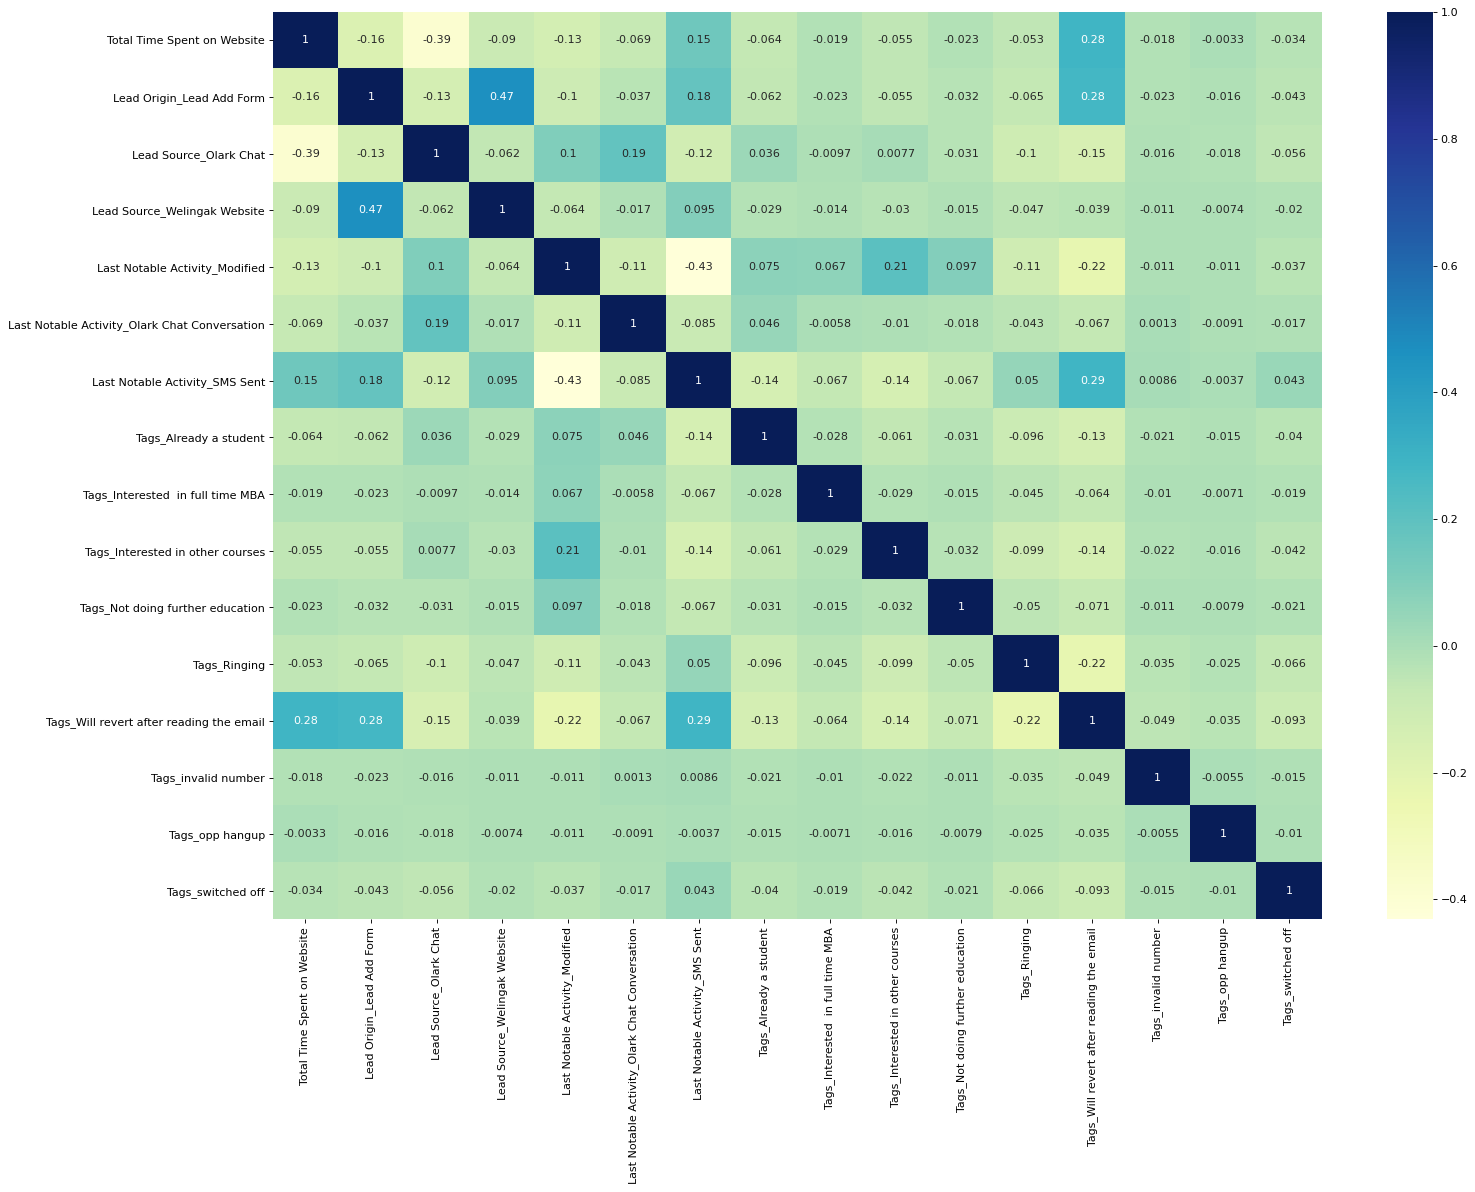

In [106]:
# Now lets check for correlation using heatmap among all the variables
plt.figure(figsize=(20,15), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

In [107]:
#Get prediction values now
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5058    0.167393
4933    0.010464
3940    0.013300
7317    0.003753
4122    0.005837
856     0.093298
7460    0.010464
2868    0.996577
1387    0.995292
1914    0.018646
dtype: float64

In [108]:
# reshaping the numpy array containing predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.16739275, 0.01046442, 0.01329961, 0.00375318, 0.00583735,
       0.09329758, 0.01046442, 0.99657743, 0.99529239, 0.01864591])

### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [109]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,1.0,0.167393,5058
1,0.0,0.010464,4933
2,0.0,0.013300,3940
3,0.0,0.003753,7317
4,0.0,0.005837,4122


### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [110]:
y_train_pred_final['predicted_conv'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x >= 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted_conv
0,1.0,0.167393,5058,0
1,0.0,0.010464,4933,0
2,0.0,0.013300,3940,0
3,0.0,0.003753,7317,0
4,0.0,0.005837,4122,0


#### Lets see the confusion metrics

In [111]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted_conv)
print(confusion)

[[3535  166]
 [ 279 1720]]


In [112]:
# lets check the accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted_conv))

0.9219298245614035


## Metrics beyond simply accuracy

In [113]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [114]:
#sensitivity 
TP/float(TP+FN)

0.8604302151075538

In [115]:
#specificity
TN/float(TN+FP)

0.9551472574979735

In [116]:
# Calculate false postive rate - predicting as hot leads when customer did not convert
print(FP/ float(TN+FP))

0.04485274250202648


In [117]:
# positive predictive value 
TP / float(TP+FP)

0.911983032873807

In [118]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9268484530676455


In [119]:
#Precision
#TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.911983032873807

# Plotting the ROC Curve

In [120]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [121]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

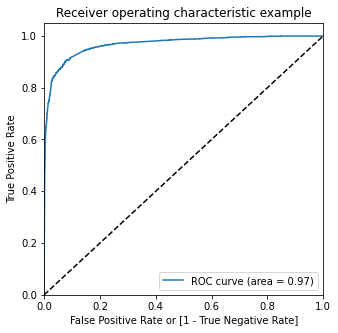

In [122]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

# Finding Optimal Cutoff Point

In [123]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted_conv,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1.0,0.167393,5058,0,1,1,0,0,0,0,0,0,0,0
1,0.0,0.010464,4933,0,1,0,0,0,0,0,0,0,0,0
2,0.0,0.013300,3940,0,1,0,0,0,0,0,0,0,0,0
3,0.0,0.003753,7317,0,1,0,0,0,0,0,0,0,0,0
4,0.0,0.005837,4122,0,1,0,0,0,0,0,0,0,0,0


In [124]:

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,Probability,Accuracy,Sensitivity,Specificity
0.0,0.0,0.350702,1.000000,0.000000
0.1,0.1,0.845088,0.963982,0.780870
0.2,0.2,0.909298,0.914457,0.906512
0.3,0.3,0.916316,0.898449,0.925966
0.4,0.4,0.915789,0.880440,0.934882
0.5,0.5,0.921930,0.860430,0.955147
0.6,0.6,0.922982,0.838419,0.968657
0.7,0.7,0.909825,0.784392,0.977574
0.8,0.8,0.900877,0.749375,0.982707
0.9,0.9,0.875965,0.660830,0.992164


Lets plot the sensitivity, specificity to know the optimal threshold and the meeting point will determine that.

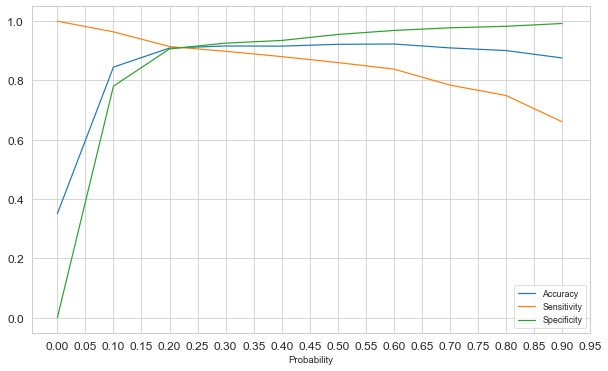

In [125]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'], figsize=(10,6))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

In [126]:
# checking for 0.24 Cutoff value
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x >= 0.24 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted_conv,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1.0,0.167393,5058,0,1,1,0,0,0,0,0,0,0,0,0
1,0.0,0.010464,4933,0,1,0,0,0,0,0,0,0,0,0,0
2,0.0,0.013300,3940,0,1,0,0,0,0,0,0,0,0,0,0
3,0.0,0.003753,7317,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,0.005837,4122,0,1,0,0,0,0,0,0,0,0,0,0


In [127]:
#accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9124561403508772

In [128]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion1

array([[3387,  314],
       [ 185, 1814]], dtype=int64)

In [129]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [130]:
# sensitivity /Recall
print('sensitivity',TP / float(TP+FN))
# specificity
print('specificity',TN / float(TN+FP))
# Positive predictive value 
print ('PPV',TP / float(TP+FP))
# Negative predictive value
print ('FPV',TN / float(TN+ FN))
#presicion
print('Precision',confusion1[1,1]/(confusion1[0,1]+confusion1[1,1]))


sensitivity 0.9074537268634317
specificity 0.915158065387733
PPV 0.8524436090225563
FPV 0.9482082866741322
Precision 0.8524436090225563


In [131]:
# checking with 0.23 cutoff
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x >= 0.23 else 0)


confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion1

TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives


# sensitivity /Recall
print('sensitivity',TP / float(TP+FN))
# specificity
print('specificity',TN / float(TN+FP))
# Positive predictive value 
print ('PPV',TP / float(TP+FP))
# Negative predictive value
print ('FPV',TN / float(TN+ FN))
#presicion
print('Precision',confusion1[1,1]/(confusion1[0,1]+confusion1[1,1]))

sensitivity 0.9074537268634317
specificity 0.91272629019184
PPV 0.8488535329901732
FPV 0.9480774628122369
Precision 0.8488535329901732


In [132]:
# checking with 0.22 cutoff
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x >= 0.22 else 0)



confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


# sensitivity /Recall
print('sensitivity',TP / float(TP+FN))
# specificity
print('specificity',TN / float(TN+FP))
# Positive predictive value 
print ('PPV',TP / float(TP+FP))
# Negative predictive value
print ('FPV',TN / float(TN+ FN))
#presicion
print('Precision',confusion2[1,1]/(confusion2[0,1]+confusion2[1,1]))

sensitivity 0.9084542271135568
specificity 0.9111051067279113
PPV 0.8466200466200466
FPV 0.9485232067510548
Precision 0.8466200466200466


## After checking for cutoffs 0.24, 0.23 and 0.22, We are going with 0.22 as threshold cutoff as the values look more promising

### Precision and recall Tradeoff

In [133]:
from sklearn.metrics import precision_score, recall_score

In [134]:
 precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8466200466200466

In [135]:
 recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9084542271135568

In [136]:
from sklearn.metrics import precision_recall_curve

In [137]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       1.0
 1       0.0
 2       0.0
 3       0.0
 4       0.0
 5       0.0
 6       0.0
 7       1.0
 8       1.0
 9       0.0
 10      0.0
 11      0.0
 12      0.0
 13      0.0
 14      0.0
 15      0.0
 16      1.0
 17      0.0
 18      1.0
 19      1.0
 20      0.0
 21      1.0
 22      0.0
 23      1.0
 24      0.0
 25      1.0
 26      1.0
 27      1.0
 28      0.0
 29      0.0
 30      1.0
 31      0.0
 32      0.0
 33      0.0
 34      0.0
 35      0.0
 36      0.0
 37      1.0
 38      1.0
 39      1.0
 40      1.0
 41      0.0
 42      0.0
 43      0.0
 44      0.0
 45      0.0
 46      0.0
 47      0.0
 48      0.0
 49      0.0
 50      1.0
 51      0.0
 52      0.0
 53      0.0
 54      0.0
 55      0.0
 56      0.0
 57      0.0
 58      1.0
 59      0.0
 60      0.0
 61      0.0
 62      0.0
 63      0.0
 64      0.0
 65      0.0
 66      0.0
 67      0.0
 68      1.0
 69      0.0
 70      1.0
 71      0.0
 72      0.0
 73      0.0
 74      1.0
 75      1.0
 76      0.0

In [138]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

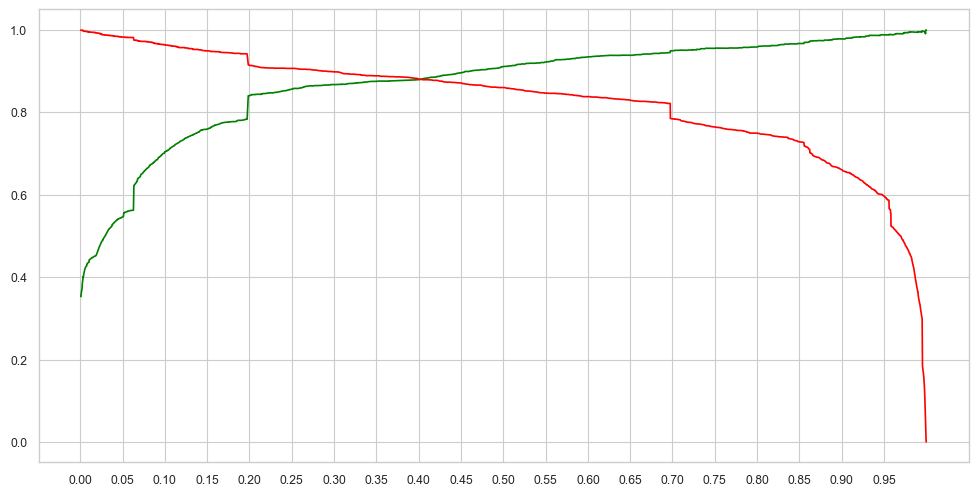

In [139]:
plt.figure(figsize=(12, 6), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

## Making predictions on the test set

In [140]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_Yes,Country_Outside India,A free copy of Mastering The Interview_Yes,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Already a student,Tags_Busy,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
4425,-1.171714,-0.859041,-1.268424,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6291,0.087956,-0.651561,0.550338,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7956,-1.171714,-0.859041,-1.268424,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3509,0.927735,1.789595,1.762847,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
444,0.087956,-0.578663,-0.359043,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [141]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Tags_Already a student,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_opp hangup,Tags_switched off
4425,-0.859041,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
6291,-0.651561,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7956,-0.859041,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3509,1.789595,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
444,-0.578663,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [142]:
#Add constant
X_test_sm = sm.add_constant(X_test)

In [143]:
y_test_pred = res.predict(X_test_sm)

In [144]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [145]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [146]:
y_test_df['LeadID'] = y_test_df.index

In [147]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [148]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [149]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [150]:
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Conversion_Prob'], axis=1)

In [151]:
y_pred_final.shape

(2444, 3)

### Using the probability threshold value 0f 0.22 on the test dataset to predict if a lead will convert

In [152]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x >= 0.22 else 0)

In [153]:
# Let's check the overall accuracy.
acc_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
acc_score

0.9095744680851063

In [154]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_test)

[[1480  150]
 [  71  743]]


In [155]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,4425,0.0,0.067339,0
1,6291,0.0,0.002675,0
2,7956,0.0,0.197240,0
3,3509,0.0,0.552555,1
4,444,0.0,0.084847,0


In [156]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [157]:
# sensitivity 
TP / float(TP+FN)

0.9127764127764127

In [158]:
# specificity
TN / float(TN+FP)

0.9079754601226994

In [159]:
# Calculate false postive rate - predicting as hot leads when customer did not convert
print(FP/ float(TN+FP))

0.09202453987730061


In [160]:
# Positive predictive value 
print (TP / float(TP+FP))

0.832026875699888


In [161]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9542230818826564


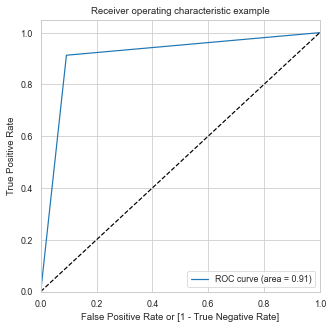

In [162]:
draw_roc(y_pred_final.Converted, y_pred_final.final_predicted)

In [163]:
#Recall
recall = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
recall

0.9127764127764127

In [164]:
#Precision
precision = confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])
precision

0.832026875699888

### Test model Recall 91.3%, Precision 83.2%

# Calculating the Lead Score

In [165]:
# train final set
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Conversion_Prob,LeadID,predicted_conv,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1.0,0.167393,5058,0,1,1,0,0,0,0,0,0,0,0,0
1,0.0,0.010464,4933,0,1,0,0,0,0,0,0,0,0,0,0
2,0.0,0.013300,3940,0,1,0,0,0,0,0,0,0,0,0,0
3,0.0,0.003753,7317,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,0.005837,4122,0,1,0,0,0,0,0,0,0,0,0,0


In [166]:
leads_train_pred = leads_train_pred[['LeadID','Converted','Conversion_Prob','final_predicted']]
leads_train_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,5058,1.0,0.167393,0
1,4933,0.0,0.010464,0
2,3940,0.0,0.013300,0
3,7317,0.0,0.003753,0
4,4122,0.0,0.005837,0


In [167]:
# test final set
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,4425,0.0,0.067339,0
1,6291,0.0,0.002675,0
2,7956,0.0,0.197240,0
3,3509,0.0,0.552555,1
4,444,0.0,0.084847,0


In [168]:
# Concatenating the train and the test dataset
lead_full_pred = leads_train_pred.append(y_pred_final)
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,5058,1.0,0.167393,0
1,4933,0.0,0.010464,0
2,3940,0.0,0.013300,0
3,7317,0.0,0.003753,0
4,4122,0.0,0.005837,0


In [169]:
print(leads_train_pred.shape)
print(y_pred_final.shape)
print(lead_full_pred.shape)

(5700, 4)
(2444, 4)
(8144, 4)


In [170]:
# Calculate lead score now
lead_full_pred['Lead_Score'] = lead_full_pred['Conversion_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted,Lead_Score
0,5058,1.0,0.167393,0,17
1,4933,0.0,0.010464,0,1
2,3940,0.0,0.013300,0,1
3,7317,0.0,0.003753,0,0
4,4122,0.0,0.005837,0,1


In [171]:
# set the index as lead id and sort in ascending to view the results
lead_full_pred = lead_full_pred.set_index('LeadID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Conversion_Prob,final_predicted,Lead_Score
LeadID,,,,
0,0.0,0.010464,0,1
1,0.0,0.008405,0,1
2,1.0,0.992792,1,99
3,0.0,0.001088,0,0
4,1.0,0.968159,1,97


In [172]:
Orignal_leadno=leads[['Lead Number']].iloc[:,0].to_frame()
Orignal_leadno.head()

,Lead Number
0,660737.0
1,660728.0
2,660727.0
3,660719.0
4,660681.0


In [173]:
# Now we need to merge with lead ids to determine the lead.
leads_with_score = pd.concat([Orignal_leadno, lead_full_pred], axis=1)
leads_with_score.head(10)

,Lead Number,Converted,Conversion_Prob,final_predicted,Lead_Score
0,660737.0,0.0,0.010464,0,1
1,660728.0,0.0,0.008405,0,1
2,660727.0,1.0,0.992792,1,99
3,660719.0,0.0,0.001088,0,0
4,660681.0,1.0,0.968159,1,97
5,660680.0,0.0,0.062866,0,6
6,660673.0,1.0,0.979120,1,98
7,660664.0,0.0,0.062866,0,6
8,660624.0,0.0,0.073122,0,7
9,660616.0,0.0,0.071342,0,7


In [174]:
leads_with_score.shape

(8144, 5)

## Last Model was Model 6 - Finding Feature Importance

In [175]:
# logm6 summary - final model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5700
Model:                            GLM   Df Residuals:                     5683
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1183.0
Date:                Sun, 07 Mar 2021   Deviance:                       2366.0
Time:                        22:17:39   Pearson chi2:                 8.50e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7456      0.101    -17.349      0.000      -1.943      -1.548
Total Time Spent on Website                       1.0933      0.062     17.606      0.000       0.972       1.215
Lead Origin_Lead Add Form                         1.3365      0.356      3.755      0.000       0.639       2.034
Lead Source_Olark Chat                            1.2811      0.148      8.663      0.000       0.991       1.571
Lead Source_Welingak Website                      4.4638      0.821      5.436      0.000       2.854       6.073
Last Notable Activity_Modified                   -1.2982      0.136     -9.566      0.000      -1.564      -1.032
Last Notable Activity_Olark Chat Conversation    -1.5212      0.434     -3.506      0.000      -2.372      -0.671
Last Notable Activity_SMS Sent                    2.2384      0.138     16.204      0.000       1.968       2.509
Tags_Already a student                           -3.4627      0.728     -4.757      0.000      -4.889      -2.036
Tags_Interested  in full time MBA                -2.4776      1.031     -2.404      0.016      -4.498      -0.458
Tags_Interested in other courses                 -1.8474      0.387     -4.774      0.000      -2.606      -1.089
Tags_Not doing further education                 -2.6194      1.026     -2.553      0.011      -4.630      -0.608
Tags_Ringing                                     -3.4630      0.252    -13.743      0.000      -3.957      -2.969
Tags_Will revert after reading the email          4.4793      0.184     24.292      0.000       4.118       4.841
Tags_invalid number                              -3.3579      1.062     -3.162      0.002      -5.439      -1.277
Tags_opp hangup                                  -2.3150      1.057     -2.191      0.028      -4.386      -0.244
Tags_switched off                                -3.6986      0.610     -6.067      0.000      -4.893      -2.504
=================================================================================================================
"""

In [176]:
feature_importance=res.params[1:]

In [177]:
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Total Time Spent on Website                       24.407887
Lead Origin_Lead Add Form                         29.837232
Lead Source_Olark Chat                            28.601333
Lead Source_Welingak Website                      99.652219
Last Notable Activity_Modified                   -28.981689
Last Notable Activity_Olark Chat Conversation    -33.960226
Last Notable Activity_SMS Sent                    49.971081
Tags_Already a student                           -77.303564
Tags_Interested  in full time MBA                -55.312137
Tags_Interested in other courses                 -41.243460
Tags_Not doing further education                 -58.477589
Tags_Ringing                                     -77.311637
Tags_Will revert after reading the email         100.000000
Tags_invalid number                              -74.964992
Tags_opp hangup                                  -51.681926
Tags_switched off                                -82.569384
dtype: float64

In [178]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False)

,index,0
12,Tags_Will revert after reading the email,100.000000
3,Lead Source_Welingak Website,99.652219
6,Last Notable Activity_SMS Sent,49.971081
1,Lead Origin_Lead Add Form,29.837232
2,Lead Source_Olark Chat,28.601333
0,Total Time Spent on Website,24.407887
4,Last Notable Activity_Modified,-28.981689
5,Last Notable Activity_Olark Chat Conversation,-33.960226
9,Tags_Interested in other courses,-41.243460
14,Tags_opp hangup,-51.681926
